In [1]:
import sys    
print('Running on Python version: {}'.format(sys.version))


Running on Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]


In [2]:

#output_notebook()
import os
%matplotlib inline
os.system('jupyter trust Visualisation_search_terms_reading_levelGS.ipynb')

256

Rick Gerkin [3:16 PM]
Here is the list of ideas/suggestions I promised:
- Reduce the amount of stuff in the progress report.  You can have a different one for each week, or just copy them as needed, and remove all the stuff that isn't pertinent to the current work.  You can always bring it back in later.  If rendering figures, just render the ones you need to show the point.  


- Show some raw values in the table, e.g. the input resistance for a candidate model.  You don't need to show the test observation values, except maybe outside the table on a separate line (since they are the same for every gene using the same test).  

- Try scaling up to three parameters - you can reduce the grid sampling to, say 6x6x6 (from 10x10 for 2 parameters), that way it isn't too much more computationally complex. 

- Then you can show the corresponding figures and tables for this three parameter case, show all of the 2D cross-sections through the global optimum.  Or maybe you can think of other ways for showing 3D.  
- Make sure the code isn't getting too unwieldy.  Condense and refactor and clean up regularly.

In [3]:
import pickle
#!pip install prettyplotlib
import prettyplotlib as ppl
from prettyplotlib import plt
from prettyplotlib import brewer2mpl
import numpy as np
import string

green_purple = brewer2mpl.get_map('PRGn', 'diverging', 11).mpl_colormap


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
from neuronunit.optimization.results_analysis import make_report, min_max
with open('pre_grid_reports.p','rb') as f:#
    grid_results = pickle.load(f)

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
pop = package[0]
print(pop[0].dtc.attrs.items())
history = package[4]
gen_vs_pop =  package[6]


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.


dict_items([('a', 0.273288417631972), ('b', -2.5511245505753264e-09), ('vr', -71.2139341678739)])


In [4]:
attrs_ = [ list(p.dtc.attrs.keys()) for i,p in history.genealogy_history.items() ]
attrs = attrs_[0]
print(attrs)

scores_ = [ list(p.dtc.scores.keys()) for i,p in history.genealogy_history.items() ]
scores = scores_[0]
from collections import OrderedDict

urlDats = []
hi = [ (i,p) for i,p in history.genealogy_history.items() ]
pops_ = [ (i,p) for i,p in enumerate(pop) ]

sc = [ (i,p) for i,p in enumerate(grid_results) ]

import quantities as pq

def history_iter(mapped):
    i,p = mapped
    gene_contents = OrderedDict()
    gene_contents['gene_number'] = i
    
    attrs = list(p.dtc.attrs.keys()) 
    scores = list(p.dtc.scores.keys()) 
    for a in attrs:
        gene_contents[a] = p.dtc.attrs[a]    
    scores0 = scores[0]
    for s in scores:
        gene_contents[s] = p.dtc.scores[s]
    gene_contents[str('total')] = sum(p.dtc.scores.values())
    for test in p.dtc.score.keys():
        if 'prediction' in p.dtc.score[test]:
            
            
           
            gene_contents['observation'] = p.dtc.score[test]['observation']['mean']
            try:
                pass
                #gene_contents['prediction'] = p.dtc.score[test]['prediction']['value']
                #x = pq.Quantity(gene_contents['prediction'])
                
                #print(x.simplified)
                
            except:
                gene_contents['prediction'] = p.dtc.score[test]['prediction']['mean']
                x = pq.Quantity(gene_contents['prediction'])
                print(x.simplified)
                
                gene_contents['disagreement'] = np.abs(float(gene_contents['observation'])) - np.abs(float(gene_contents['prediction']))#p.dtc.score[test]['agreement']
    return gene_contents


    
def process_dics(contents):
    dfs = []
    for gene_contents in contents:
        # pandas Data frames are best data container for maths/stats, but steep learning curve.
        # Other exclusion criteria. Exclude reading levels above grade 100,
        # as this is most likely a problem with the metric algorithm, and or rubbish data in.

        if len(dfs) == 0:
            dfs = pd.DataFrame(pd.Series(gene_contents)).T
        dfs = pd.concat([ dfs, pd.DataFrame(pd.Series(gene_contents)).T ])
    return dfs

genes = list(map(history_iter,hi))    
dfg = process_dics(genes)

grids = list(map(history_iter,sc))    
dfs = process_dics(grids)


#dfg.set_index('gene_number', inplace=True)
#dfg = dfg.drop(dfg.index[0])
dfg = dfg.reset_index()

def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]


def highlight_col(x):
    #copy df to new - original data are not changed
    df = x.copy()

    mask = df['total'] == df['total'].argmin()
    #if mask:
    print(df['total'].argmin())
    df.loc[mask, :] = 'background-color: yellow'
    df.loc[~mask,:] = 'background-color: ""'
    return df,x    




#colors,dfg = highlight_col(dfg)

#dfg

['a', 'b', 'vr']


In [5]:


def highlight_col(x):
    df = x.copy()
    mask = df['total'] ==  df['total'].min()
    df.loc[mask, :] = 'background-color: yellow'
    df.loc[~mask,:] = 'background-color: ""'
    return df    

dfg.style.apply(highlight_col, axis=None)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.ndimage as ndi
import neuronunit.optimization.exhaustive_search as es

data = np.zeros((6, 6, 6))
#data = ndi.filters.gaussian_filter(data, sigma=1)

axis = [ [ str('vr'), str('a'), str('b') ], [ str('vr'), str('b'), str('a')], [ str('b'), str('a'), str('vr') ] ]

gen_vs_pop = package[6]    

k = axis[0]
ee = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
zz = [ i.dtc.attrs[k[2]] for i in grid_results ]
yy = [ i.dtc.attrs[k[1]] for i in grid_results ]
xx = [ i.dtc.attrs[k[0]] for i in grid_results ]
hvc = es.tfc2i(xx,yy,zz,ee)


6 5 1
(6, 5, 1)


In [7]:
#from neuronunit imp
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
import quantities as pq

super_pop = []

for gp in gen_vs_pop:
    super_pop.extend(gp)
minga,maxga = min_max(super_pop)
mingr,maxgr = min_max(grid_results)
abs_min = np.min((mingr[1],minga[1]))
abs_max = np.max((maxgr[1],maxga[1]))
v = list(np.linspace(abs_min, abs_max, 15, endpoint=True))

def proc_xargs(dtc,dtcpop = None):
    model = ReducedModel(path_params['model_path'],name=str('vanilla'),backend='NEURON')
    xargs = {}
    xargs['injected_square_current'] = {}
    xargs['injected_square_current']['duration'] = 1000 * pq.ms
    xargs['injected_square_current']['amplitude'] = dtc.rheobase['value']
    xargs['injected_square_current']['delay'] = 250 * pq.ms # + 150
    model.set_attrs(dtc.attrs)
    model.inject_square_current(xargs)
    v_m = model.get_membrane_potential()
    ts = model.results['t'] # time signal
    return v_m,ts,model

def realign(contents):
    plt.clf()

    for c in contents:            
        v_m,ts,model = c
        try:
            spt = float(model.get_spike_train())
            #thr = float(model.get_threshold())

            new_time = [ t-spt for t in ts ]        
            plt.plot(new_time,v_m)
            plt.xlim(-0.03,0.03)
        except:
            print(model.get_spike_train())
            
    plt.show()        
    return _

'''
contents = []   
dtcpop = [ p.dtc for p in pop ]
dtcpop.extend([ p.dtc for p in gen_vs_pop[0] ])
for d in dtcpop:
    contents.append(proc_xargs(d))

contents.append(proc_xargs(mingr[2]))
contents.append(proc_xargs(minga[2]))

realign(contents)    
'''

'\ncontents = []   \ndtcpop = [ p.dtc for p in pop ]\ndtcpop.extend([ p.dtc for p in gen_vs_pop[0] ])\nfor d in dtcpop:\n    contents.append(proc_xargs(d))\n\ncontents.append(proc_xargs(mingr[2]))\ncontents.append(proc_xargs(minga[2]))\n\nrealign(contents)    \n'

In [8]:
from collections import OrderedDict
zz = [ list(i.dtc.scores.items()) for i in grid_results ]
xx = [ list(i.dtc.scores.items()) for i in pop ]

def sample_points(iter_dict, npoints=2):
    replacement = {}
    for p in range(0,len(iter_dict)):
        k,v = iter_dict.popitem(last=False)
        sample_points = list(np.linspace(v.max(),v.min(),npoints))
        replacement[k] = sample_points
    return replacement

from neuronunit.optimization import model_parameters as modelp
mp = OrderedDict(modelp.model_params)
smaller = {}
smaller = OrderedDict(sample_points(mp, npoints=2))
ranges = OrderedDict( {k:smaller[k] for k in smaller})
        
lims = []
for k,v in pop[0].dtc.attrs.items():
    lims.append([np.min(ranges[k]), np.max(ranges[k])])


[0.315, -8.333333333333334e-10, -13.333333333333334]
[0.315, -8.333333333333334e-10, -66.66666666666667]
[0.315, -3.3333333333333334e-09, -13.333333333333334]
[0.315, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -8.333333333333334e-10, -13.333333333333334]
[0.013333333333333334, -8.333333333333334e-10, -66.66666666666667]
[0.013333333333333334, -3.3333333333333334e-09, -13.333333333333334]
[0.013333333333333334, -3.3333333333333334e-09, -66.66666666666667]


<Figure size 432x288 with 0 Axes>

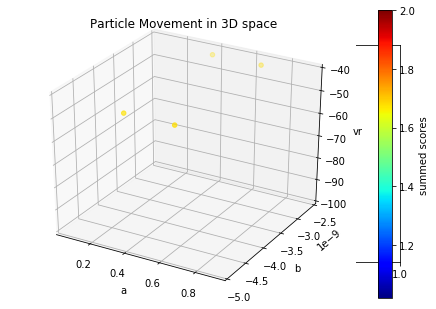

[0.315, -8.333333333333334e-10, -13.333333333333334]
[0.315, -8.333333333333334e-10, -66.66666666666667]
[0.315, -3.3333333333333334e-09, -13.333333333333334]
[0.315, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -8.333333333333334e-10, -13.333333333333334]
[0.013333333333333334, -8.333333333333334e-10, -66.66666666666667]
[0.013333333333333334, -3.3333333333333334e-09, -13.333333333333334]
[0.013333333333333334, -3.3333333333333334e-09, -66.66666666666667]
[0.6088803450587614, -8.333333333333334e-10, -40.0]
[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.3310521839232858, -3.3333333333333334e-09, -40.0]
[0.315, -3.4922850946235947e-09, -60.58761067909296]
[0.02192883436710827, -8.333333333333334e-10, -40.0]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.21914441355632e-09, -13.333333333333334]
[0.02, -3.3333333333333334e-09, -66.66666666666667]


<Figure size 432x288 with 0 Axes>

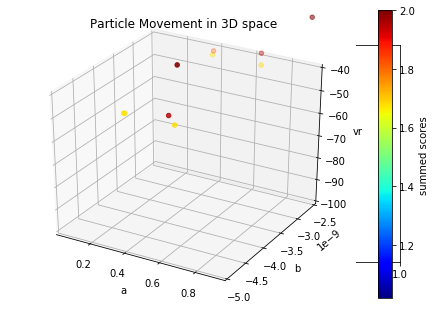

[0.315, -8.333333333333334e-10, -13.333333333333334]
[0.315, -8.333333333333334e-10, -66.66666666666667]
[0.315, -3.3333333333333334e-09, -13.333333333333334]
[0.315, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -8.333333333333334e-10, -13.333333333333334]
[0.013333333333333334, -8.333333333333334e-10, -66.66666666666667]
[0.013333333333333334, -3.3333333333333334e-09, -13.333333333333334]
[0.013333333333333334, -3.3333333333333334e-09, -66.66666666666667]
[0.6088803450587614, -8.333333333333334e-10, -40.0]
[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.3310521839232858, -3.3333333333333334e-09, -40.0]
[0.315, -3.4922850946235947e-09, -60.58761067909296]
[0.02192883436710827, -8.333333333333334e-10, -40.0]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.21914441355632e-09, -13.333333333333334]
[0.02, -3.3333333333333334e-09, -66.66666666666667]


<Figure size 432x288 with 0 Axes>

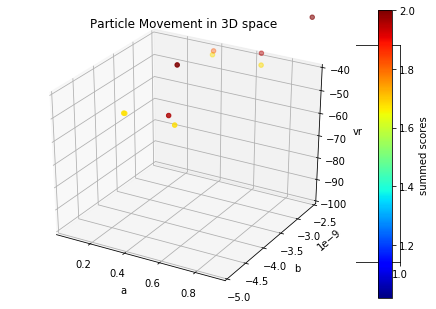

[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.315, -3.4922850946235947e-09, -60.58761067909296]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -8.333333333333334e-10, -66.66666666666667]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3550039492988272, -3.4922850946235947e-09, -58.360305218273304]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]
[0.05052481453059404, -3.3333333333333334e-09, -66.50039220562559]
[0.013333333333333334, -2.5e-09, -66.66666666666667]


<Figure size 432x288 with 0 Axes>

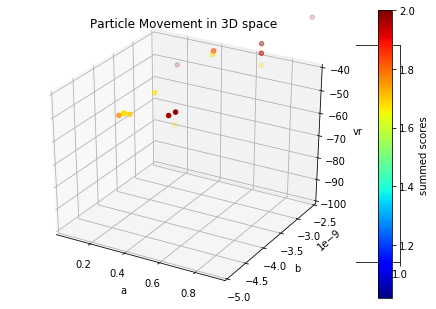

[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.315, -3.4922850946235947e-09, -60.58761067909296]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -3.3333333333333334e-09, -66.66666666666667]
[0.013333333333333334, -8.333333333333334e-10, -66.66666666666667]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3550039492988272, -3.4922850946235947e-09, -58.360305218273304]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]
[0.05052481453059404, -3.3333333333333334e-09, -66.50039220562559]
[0.013333333333333334, -2.5e-09, -66.66666666666667]


<Figure size 432x288 with 0 Axes>

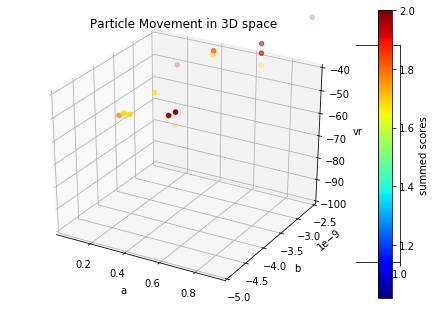

[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3550039492988272, -3.4922850946235947e-09, -58.360305218273304]
[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]
[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.3146194498796872, -3.927871456036649e-09, -61.19170463542844]
[0.24291998038255305, -2.5e-09, -58.2440791550638]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]


<Figure size 432x288 with 0 Axes>

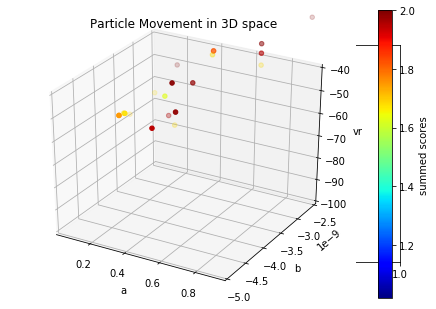

[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3550039492988272, -3.4922850946235947e-09, -58.360305218273304]
[0.315, -8.333333333333334e-10, -61.075478572218884]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]
[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.3146194498796872, -3.927871456036649e-09, -61.19170463542844]
[0.24291998038255305, -2.5e-09, -58.2440791550638]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.48549718161569e-09, -65.85699840264657]


<Figure size 432x288 with 0 Axes>

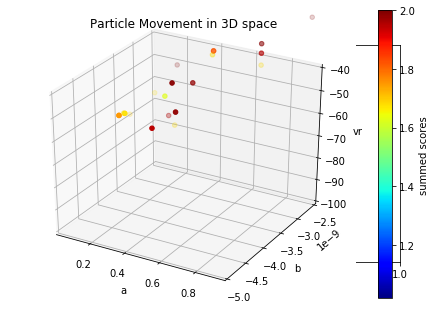

[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3146194498796872, -3.927871456036649e-09, -61.19170463542844]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.053079956481158735, -3.342393142572533e-09, -56.906110857403476]
[0.29962103104855986, -2.518585757120861e-09, -66.81279165850476]
[0.2957434979727955, -8.333333333333334e-10, -61.274385871909054]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.02, -2.5e-09, -64.42739868408385]
[0.02, -3.370087115247576e-09, -66.31771440957469]


<Figure size 432x288 with 0 Axes>

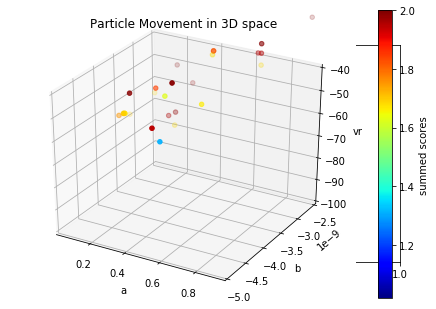

[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.3146194498796872, -3.927871456036649e-09, -61.19170463542844]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.3333333333333334e-09, -66.66666666666667]
[0.053079956481158735, -3.342393142572533e-09, -56.906110857403476]
[0.29962103104855986, -2.518585757120861e-09, -66.81279165850476]
[0.2957434979727955, -8.333333333333334e-10, -61.274385871909054]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.02, -2.5e-09, -64.42739868408385]
[0.02, -3.370087115247576e-09, -66.31771440957469]


<Figure size 432x288 with 0 Axes>

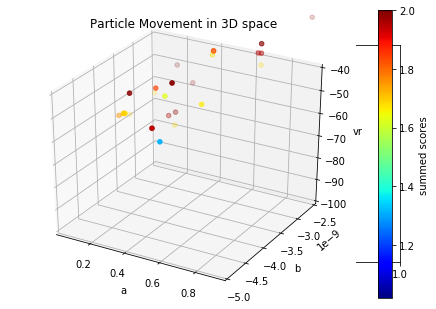

[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.370087115247576e-09, -66.31771440957469]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.27352057352755077, -3.823449591075212e-09, -69.90117175185945]
[0.315, -2.5e-09, -58.905006140009824]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.81524264137698]
[0.024076530934636266, -3.370087115247576e-09, -66.23869187574314]


<Figure size 432x288 with 0 Axes>

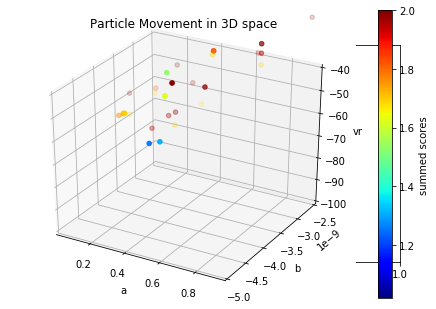

[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.315, -8.333333333333334e-10, -56.641937601974206]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.02, -3.370087115247576e-09, -66.31771440957469]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.27352057352755077, -3.823449591075212e-09, -69.90117175185945]
[0.315, -2.5e-09, -58.905006140009824]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.81524264137698]
[0.024076530934636266, -3.370087115247576e-09, -66.23869187574314]


<Figure size 432x288 with 0 Axes>

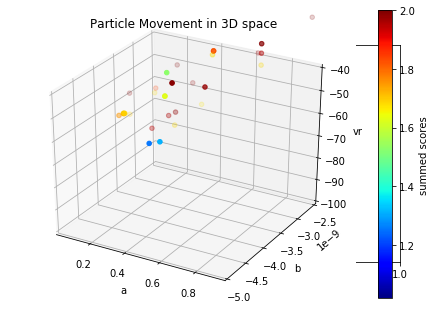

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.27352057352755077, -3.823449591075212e-09, -69.90117175185945]
[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.37559075770696215, -3.892017325880521e-09, -41.936501378833796]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.3525818637910038, -3.353952218065476e-09, -69.54387869911984]
[0.02213734982438145, -2.5e-09, -64.89514906490476]
[0.13005816112398993, -2.5e-09, -67.00686869758161]


<Figure size 432x288 with 0 Axes>

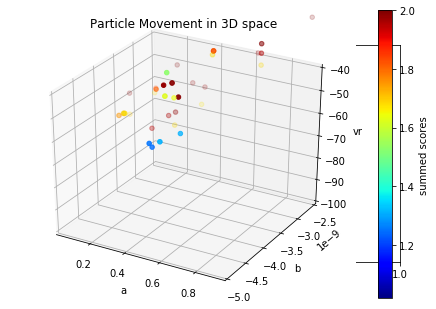

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.27352057352755077, -3.823449591075212e-09, -69.90117175185945]
[0.30112020721845123, -3.3333333333333334e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.37559075770696215, -3.892017325880521e-09, -41.936501378833796]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.3525818637910038, -3.353952218065476e-09, -69.54387869911984]
[0.02213734982438145, -2.5e-09, -64.89514906490476]
[0.13005816112398993, -2.5e-09, -67.00686869758161]


<Figure size 432x288 with 0 Axes>

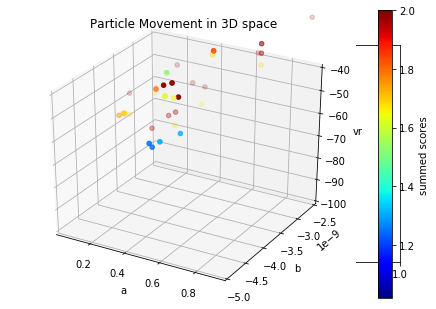

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.6675745941038378e-09, -75.36231328231526]
[0.4246990849696267, -3.7272080096266024e-09, -49.60039895562707]
[0.3085665968984725, -3.7075286016730885e-09, -68.25226625270791]
[0.06660936379372262, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]


<Figure size 432x288 with 0 Axes>

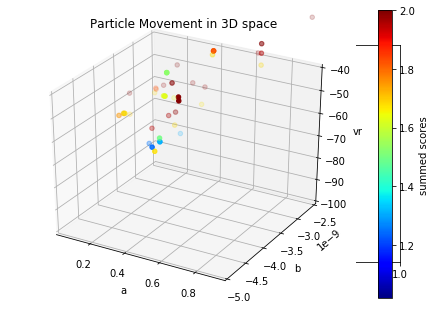

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.314622742368091, -3.727677747966449e-09, -69.54387869911984]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.6675745941038378e-09, -75.36231328231526]
[0.4246990849696267, -3.7272080096266024e-09, -49.60039895562707]
[0.3085665968984725, -3.7075286016730885e-09, -68.25226625270791]
[0.06660936379372262, -2.5e-09, -67.16579765494093]
[0.02, -8.333333333333334e-10, -64.73622010754545]


<Figure size 432x288 with 0 Axes>

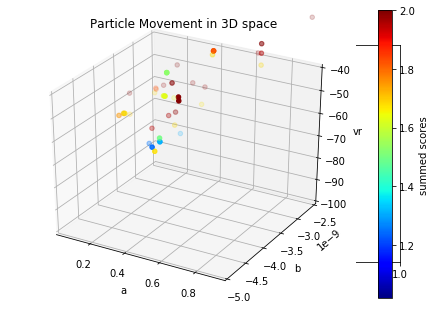

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.3085665968984725, -3.7075286016730885e-09, -68.25226625270791]
[0.2706730634728598, -3.159413608400028e-09, -42.822189041145094]
[0.2706730634728598, -3.3333333333333334e-09, -51.243295442573455]
[0.2008063394689118, -3.7168469464077294e-09, -49.435768329594566]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.07506503768602585, -2.5001249054207695e-09, -56.21500035635778]
[0.3179101550700237, -3.995767445848213e-09, -71.60955897822325]


<Figure size 432x288 with 0 Axes>

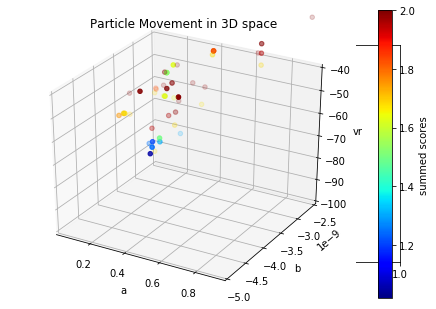

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.7350154386854315e-09, -72.67703324455817]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.3085665968984725, -3.7075286016730885e-09, -68.25226625270791]
[0.2706730634728598, -3.159413608400028e-09, -42.822189041145094]
[0.2706730634728598, -3.3333333333333334e-09, -51.243295442573455]
[0.2008063394689118, -3.7168469464077294e-09, -49.435768329594566]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.07506503768602585, -2.5001249054207695e-09, -56.21500035635778]
[0.3179101550700237, -3.995767445848213e-09, -71.60955897822325]


<Figure size 432x288 with 0 Axes>

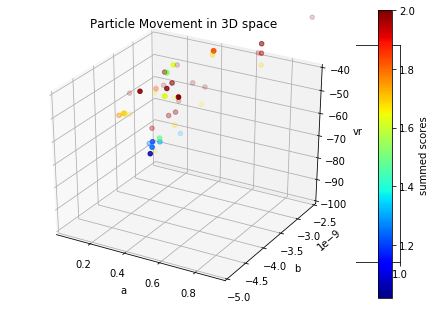

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.3179101550700237, -3.995767445848213e-09, -71.60955897822325]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.33026846111589847, -3.339791351625096e-09, -40.14005851802443]
[0.3179101550700237, -3.992534096005818e-09, -71.16698910300602]
[0.4186429394869595, -3.7102922131749774e-09, -51.47489629802105]
[0.037898683844413805, -3.6909854769416966e-09, -67.15997090399145]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]


<Figure size 432x288 with 0 Axes>

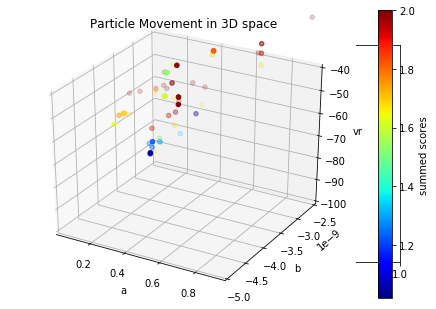

[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.2706730634728598, -3.3333333333333334e-09, -44.30800072446921]
[0.3179101550700237, -3.995767445848213e-09, -71.60955897822325]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.07506503768602585, -2.5e-09, -67.16579765494093]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.33026846111589847, -3.339791351625096e-09, -40.14005851802443]
[0.3179101550700237, -3.992534096005818e-09, -71.16698910300602]
[0.4186429394869595, -3.7102922131749774e-09, -51.47489629802105]
[0.037898683844413805, -3.6909854769416966e-09, -67.15997090399145]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]


<Figure size 432x288 with 0 Axes>

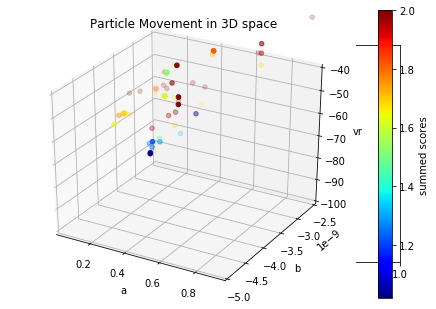

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.037898683844413805, -3.6909854769416966e-09, -67.15997090399145]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.4186429394869595, -3.7102922131749774e-09, -51.47489629802105]
[0.23767333876133087, -2.857839563630413e-09, -79.49503019285517]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.2888682299440846, -3.734585176272333e-09, -72.41080150819113]
[0.4849047652259616, -3.7102922131749774e-09, -60.83633303930037]


<Figure size 432x288 with 0 Axes>

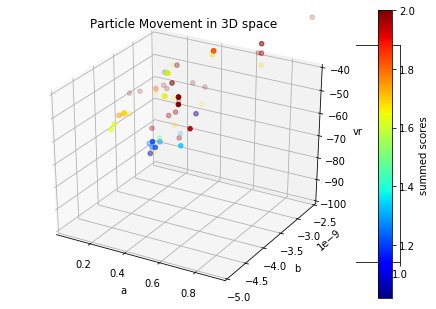

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.037898683844413805, -3.6909854769416966e-09, -67.15997090399145]
[0.273288417631972, -3.734585176272333e-09, -70.1854057629348]
[0.4186429394869595, -3.7102922131749774e-09, -51.47489629802105]
[0.23767333876133087, -2.857839563630413e-09, -79.49503019285517]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.2888682299440846, -3.734585176272333e-09, -72.41080150819113]
[0.4849047652259616, -3.7102922131749774e-09, -60.83633303930037]


<Figure size 432x288 with 0 Axes>

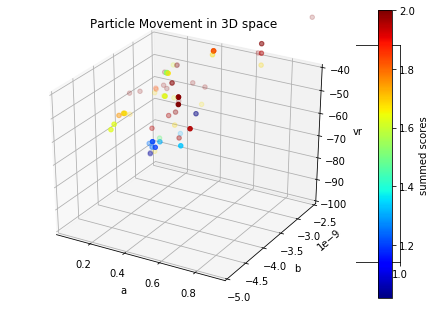

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]
[0.2732353573999294, -2.600479876792148e-09, -73.9264733204183]
[0.2707261237049024, -3.2491851101088123e-09, -40.46835540477393]
[0.273288417631972, -3.3032567032312452e-09, -49.235927049383584]
[0.4186429394869595, -3.843010464925979e-09, -48.30805171766072]
[0.029796299267768916, -3.783878733428822e-09, -67.15997090399145]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]


<Figure size 432x288 with 0 Axes>

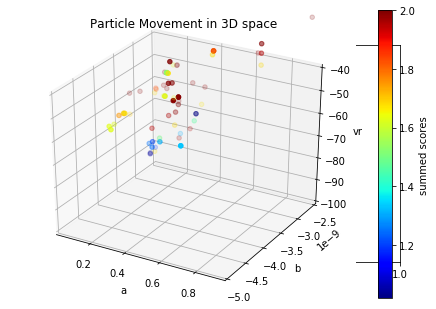

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.4186429394869595, -3.707058863333242e-09, -48.30805171766072]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]
[0.2732353573999294, -2.600479876792148e-09, -73.9264733204183]
[0.2707261237049024, -3.2491851101088123e-09, -40.46835540477393]
[0.273288417631972, -3.3032567032312452e-09, -49.235927049383584]
[0.4186429394869595, -3.843010464925979e-09, -48.30805171766072]
[0.029796299267768916, -3.783878733428822e-09, -67.15997090399145]
[0.43077137601368914, -3.707058863333242e-09, -69.4221348896267]


<Figure size 432x288 with 0 Axes>

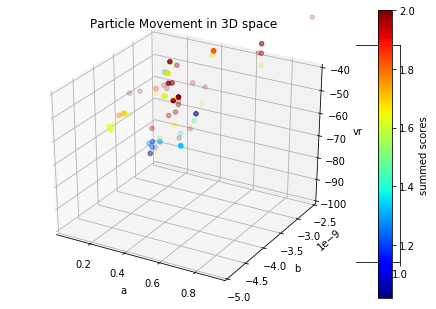

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.4186429394869595, -3.843010464925979e-09, -48.30805171766072]
[0.273288417631972, -3.3032567032312452e-09, -49.235927049383584]
[0.27334350021930776, -3.3367766830170435e-09, -42.67285581309299]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.42831402928365736, -3.2144312549036686e-09, -45.13291395635254]
[0.05969788699651307, -4.4075343416923944e-09, -73.72943976083059]
[0.23381207550868782, -3.853160109212834e-09, -48.30805171766072]
[0.4096956329854073, -3.2931070651461616e-09, -45.37877447090866]


<Figure size 432x288 with 0 Axes>

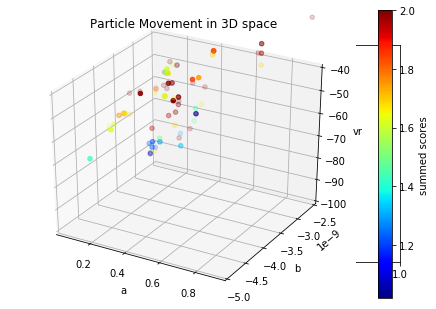

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.4186429394869595, -3.843010464925979e-09, -48.30805171766072]
[0.273288417631972, -3.3032567032312452e-09, -49.235927049383584]
[0.27334350021930776, -3.3367766830170435e-09, -42.67285581309299]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.42831402928365736, -3.2144312549036686e-09, -45.13291395635254]
[0.05969788699651307, -4.4075343416923944e-09, -73.72943976083059]
[0.23381207550868782, -3.853160109212834e-09, -48.30805171766072]
[0.4096956329854073, -3.2931070651461616e-09, -45.37877447090866]


<Figure size 432x288 with 0 Axes>

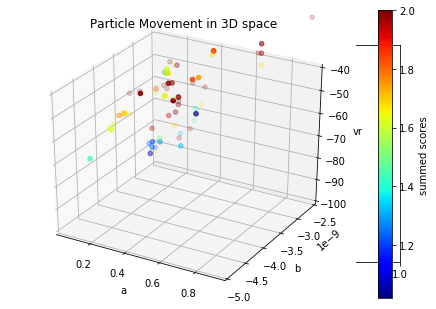

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.4096956329854073, -3.2931070651461616e-09, -45.37877447090866]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.305710313428891, -3.2978515307149654e-09, -43.36640437674861]
[0.3180971249675583, -2.5945079133506183e-09, -63.17828284862959]
[0.270617980885524, -3.76370987369104e-09, -70.90603911587178]
[0.05969788699651307, -2.5495157600654753e-09, -67.4830193238243]
[0.40795599155939233, -3.2931070651461616e-09, -46.07817400006611]
[0.2750280591762219, -3.3076721146229335e-09, -44.79160418623468]


<Figure size 432x288 with 0 Axes>

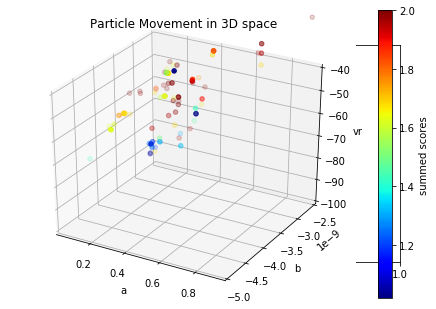

[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.05969788699651307, -3.866420167349104e-09, -67.15997090399145]
[0.4096956329854073, -3.2931070651461616e-09, -45.37877447090866]
[0.273288417631972, -3.3076721146229335e-09, -44.80516798159873]
[0.305710313428891, -3.2978515307149654e-09, -43.36640437674861]
[0.3180971249675583, -2.5945079133506183e-09, -63.17828284862959]
[0.270617980885524, -3.76370987369104e-09, -70.90603911587178]
[0.05969788699651307, -2.5495157600654753e-09, -67.4830193238243]
[0.40795599155939233, -3.2931070651461616e-09, -46.07817400006611]
[0.2750280591762219, -3.3076721146229335e-09, -44.79160418623468]


<Figure size 432x288 with 0 Axes>

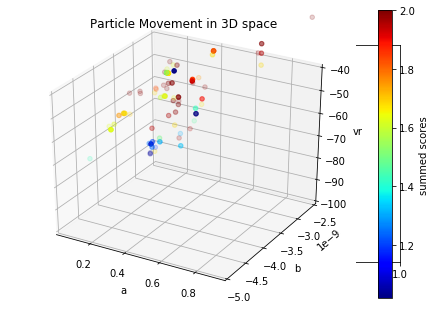

[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.305710313428891, -3.2978515307149654e-09, -43.36640437674861]
[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.3180971249675583, -2.5945079133506183e-09, -63.17828284862959]
[0.270617980885524, -3.76370987369104e-09, -70.90603911587178]
[0.3790509692980788, -3.2652419707062986e-09, -71.2139341678739]
[0.21781991224896066, -2.5877363281219307e-09, -43.36640437674861]
[0.2862277128717851, -3.3367766830170435e-09, -42.16782322227594]
[0.27067028923831166, -2.5511245505753264e-09, -68.7712679380228]
[0.2699362798897109, -2.5462111207215902e-09, -61.36540198947106]
[0.31877882596337537, -3.76370987369104e-09, -56.087330883798586]


<Figure size 432x288 with 0 Axes>

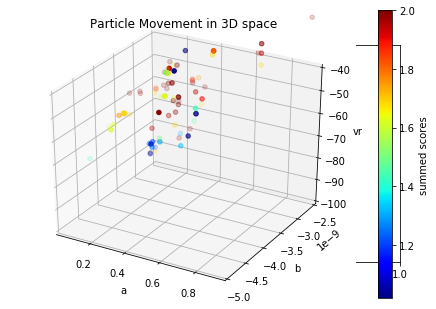

[0.273288417631972, -2.5511245505753264e-09, -71.2139341678739]
[0.305710313428891, -3.2978515307149654e-09, -43.36640437674861]
[0.2706730634728598, -3.3367766830170435e-09, -44.30800072446921]
[0.270617980885524, -2.5511245505753264e-09, -68.7712679380228]
[0.3180971249675583, -2.5945079133506183e-09, -63.17828284862959]
[0.270617980885524, -3.76370987369104e-09, -70.90603911587178]
[0.3790509692980788, -3.2652419707062986e-09, -71.2139341678739]
[0.21781991224896066, -2.5877363281219307e-09, -43.36640437674861]
[0.2862277128717851, -3.3367766830170435e-09, -42.16782322227594]
[0.27067028923831166, -2.5511245505753264e-09, -68.7712679380228]
[0.2699362798897109, -2.5462111207215902e-09, -61.36540198947106]
[0.31877882596337537, -3.76370987369104e-09, -56.087330883798586]


<Figure size 432x288 with 0 Axes>

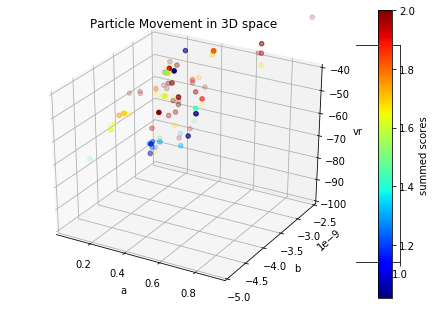

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from matplotlib import animation, rc
from IPython.display import HTML

#rc('animation', html='html5')
#options = {'c1':0.5, 'c2':0.3, 'w':0.9}


#moviewriter = animation.MovieWriter(...)
#moviewriter.setup(fig=fig, 'my_movie.ext', dpi=100)


super_set = []
length = len(gen_vs_pop)

#frame_number = [i for i, pop in enumerate(gen_vs_pop)]        
for i, pop in enumerate(gen_vs_pop):
#def to_movie(frame_number):
    other_points = []
    pf_points = []
    hof_points = []    
    labels = []
    for p in pop:
        print(p)
        xyz = []
        for k,v in p.dtc.attrs.items():
            xyz.append(v)
            labels.append(k)
        other_points.append(xyz)

    #lims = []
    #for k,v in pop[0].dtc.attrs.items():
    #    lims.append((np.min(ranges[k]), np.max(ranges[k])))

    fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    fig, ax = plt.subplots(1, 1)#, figsize=figsize)
    ax = Axes3D(fig)
    

    ax.set_xlim(lims[0])
    ax.set_ylim(lims[1])
    ax.set_zlim(lims[2])

    # Set plot title
    #labels=('x-axis', 'y-axis', 'z-axis')#,
    interval=80#,
    title='Particle Movement in 3D space'#,
    title_fontsize="large"#,
    text_fontsize="medium"
    ax.set_title(title, fontsize=title_fontsize)



    # Set plot axes labels

    # Set plot limits

    errors = [ np.sum(list(p.dtc.scores.values())) for p in pop ]
    xx = [ i[0] for i in other_points ]
    yy = [ i[1] for i in other_points ]
    zz = [ i[2] for i in other_points ]
    if len(super_set) !=0 :
        for ss in super_set:
            ops, ers = ss
            p = ax.scatter3D([i[0] for i in ops], [ i[1] for i in ops], [i[2] for i in ops], alpha=0.0925, c=ers, cmap='jet', marker='o', vmin=abs_min, vmax=abs_max)
            #ax.set_autoscalez_on(False)

    p = ax.scatter3D(xx, yy, zz, c=errors, cmap='jet', marker='o', vmin=abs_min, vmax=abs_max)
    #print(xx,yy,zz)
    #print([l for l in lims[0]], [l for l in lims[1]], [l for l in lims[2]])
    #p = ax.scatter3D([l for l in lims[0]], [l for l in lims[1]], [l for l in lims[2]], c=[2.0,2.0], marker='*', vmin=abs_min, vmax=abs_max)
    #ax.set_autoscalez_on(False)

    cb = fig.colorbar(p)
    cb.set_label('summed scores')

    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]

    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs
    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs

    ax.set_xlabel(str(labels[0]))
    ax.set_ylabel(str(labels[1]))
    ax.set_zlabel(str(labels[2]))

    plt.savefig('particle_cube_'+str(float(i/length))+str('.png'))
    super_set.append((other_points,errors))    
    plt.show()

    #return ax


frame_number = [i for i, pop in enumerate(gen_vs_pop)]        
#fig = plt.figure()

#_ = list(map(to_movie,frame_number))

#anim = animation.FuncAnimation(fig, func=to_movie,
#                              frames=frame_number,
#                              interval=30)


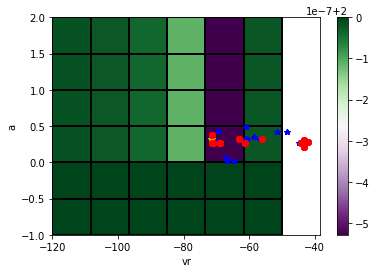

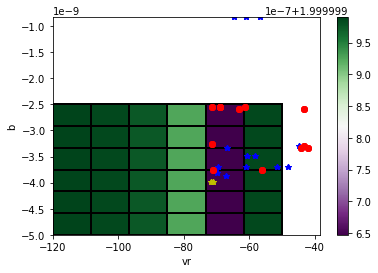

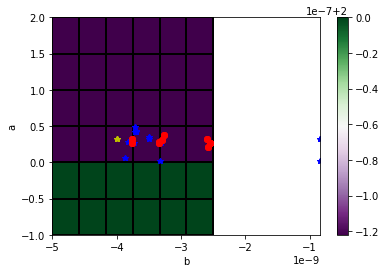

In [10]:
axis = [ [ str('vr'), str('a'), str('b') ], [ str('vr'), str('b'), str('a')], [ str('b'), str('a'), str('vr') ] ]

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]

for k in axis:    
    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results ]

    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(6,6), weights=zz, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(6,6))
    #binned , _, _ = np.histogram(zce, bins=10)

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    #scat = ppl.pcolormesh(fig, ax, xi, yi, zi, edgecolors='black', cmap=green_purple)
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black', cmap=green_purple)
    


    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()


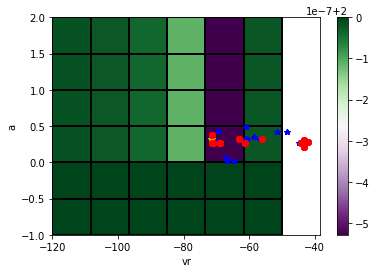

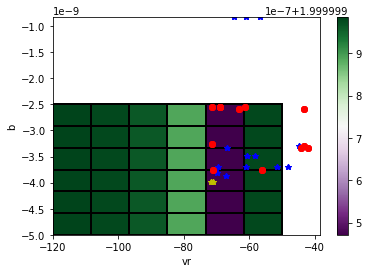

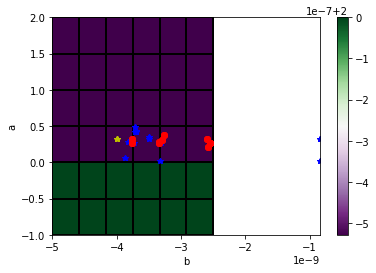

In [11]:

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]
for k in axis:    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs
    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    gba = gbest_grid_attrs[k[2]]   
    zz = [ np.sum(list(i.dtc.attrs.values())) for i in grid_results ]
    zce = [ np.sum(list(i.dtc.scores.values())) for i in grid_results if i.dtc.attrs[k[2]] == gba]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(6,6), weights=zce, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(6,6))

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black', cmap=green_purple)

    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

    
    

In [12]:
nparams=3
new_report = make_report(grid_results,pop, nparams)
from neuronunit.optimization import exhaustive_search as es
print(new_report)

Report: 
did it work? True was it better True
the difference between brute force candidates model parameters and the GA's model parameters:
-0.017819912248960484 0.20000000000000018 0.21781991224896066 a
the relative distance scaled by the length of the parameter dimension of interest:
0.0192647699988762
the difference between brute force candidates model parameters and the GA's model parameters:
-2.4122636718780694e-09 -5e-09 -2.5877363281219307e-09 b
the relative distance scaled by the length of the parameter dimension of interest:
0.9649054687512277
the difference between brute force candidates model parameters and the GA's model parameters:
-20.633595623251388 -64.0 -43.36640437674861 vr
the relative distance scaled by the length of the parameter dimension of interest:
0.34389326038752316
[0.9996337918357708, 0.018053990681726084]
[0.9996337918357708, 0.018053990681726084]
the difference between brute force candidates model parameters and the GA's model parameters:
-0.0178199122489

In [37]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size':16})
import matplotlib.pyplot as plt

def plot_surface(fig_trip,ax,model_param0,model_param1,history):
    '''

    Move this method back to plottools
    Inputs should be keys, that are parameters see new function definition below
    '''
    td = list(history.genealogy_history[1].dtc.attrs.keys())
    x = [ i for i,j in enumerate(td) if str(model_param0) == j ][0]
    y = [ i for i,j in enumerate(td) if str(model_param1) == j ][0]
    
    all_inds = history.genealogy_history.values()
    sums = np.array([np.sum(ind.fitness.values) for ind in all_inds])

    xs = np.array([ind[x] for ind in all_inds])
    ys = np.array([ind[y] for ind in all_inds])
    min_ys = ys[np.where(sums == np.min(sums))]
    min_xs = xs[np.where(sums == np.min(sums))]

    #fig_trip, ax_trip = plt.subplots(1, figsize=(10, 5), facecolor='white')
    trip_axis = ax.tripcolor(xs,ys,sums,20,norm=matplotlib.colors.LogNorm())
    plot_axis = ax.plot(list(min_xs), list(min_ys), 'o', color='lightblue',label='global minima')
    #fig_trip.colorbar(trip_axis, label='Sum of Objective Errors ')
    if type(td) is not type(None):
        ax_trip.set_xlabel('Parameter '+str((td[x])))
        ax_trip.set_ylabel('Parameter '+str((td[y])))
    plot_axis = ax_trip.plot(list(min_xs), list(min_ys), 'o', color='lightblue')
    #fig_trip.tight_layout()
    return ax_trip,plot_axis
    #plt.show()

/home/jovyan/neuronunit/neuronunit/unit_test


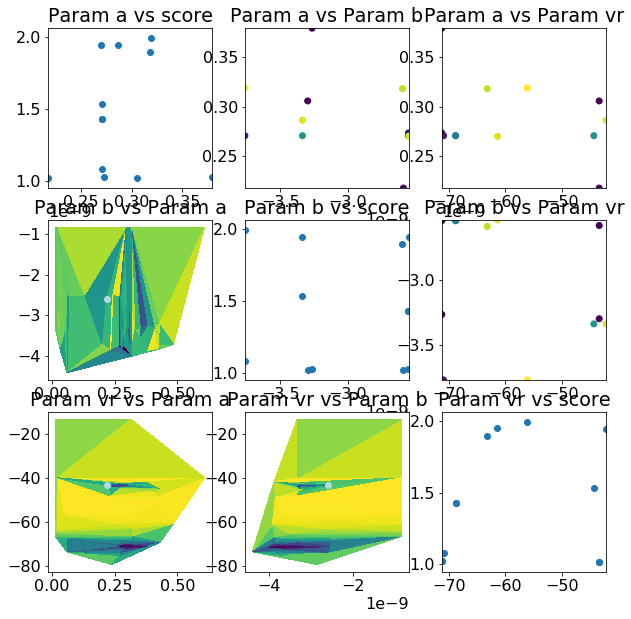

In [39]:
from prettyplotlib import plt
from neuronunit.optimization import get_neab
import copy

electro_path = str(os.getcwd())+'/pipe_tests.p'
print(os.getcwd())
assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    electro_tests = pickle.load(f)

electro_tests = get_neab.replace_zero_std(electro_tests)
electro_tests = get_neab.substitute_parallel_for_serial(electro_tests)
test, observation = electro_tests[0]

npoints = 6
tests = copy.copy(electro_tests[0][0][0:2])
import numpy as np
ax = None
from neuronunit.optimization import exhaustive_search as es


fig,ax = plt.subplots(3,3,figsize=(10,10))
attrs_list = list(pop[0].dtc.attrs)


with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)

grid_results = {}
hof = package[1]
for i in range(len(attrs_list)):
    for j in range(len(attrs_list)):
        if i<j:
            ax[i,j].set_title('Param {0} vs Param {1}'.format(attrs_list[i],attrs_list[j]))

            x = [ g.dtc.attrs[attrs_list[i]] for g in pop ]
            y = [ g.dtc.attrs[attrs_list[j]] for g in pop ]
            z = [ sum(list(g.dtc.scores.values())) for g in pop ]
            ax[i,j].scatter(y,x,c=z)
            ax[i,j].set_xlim(np.min(y),np.max(y))
            ax[i,j].set_ylim(np.min(x),np.max(x))

            
        if i == j:
            ax[i,j].set_title('Param {0} vs score'.format(attrs_list[i]))

            x = [ g.dtc.attrs[attrs_list[i]] for g in pop ]
            z = [ sum(list(g.dtc.scores.values())) for g in pop ]
            ax[i,i].scatter(x,z)
            ax[i,j].set_xlim(np.min(x),np.max(x))
            
            
        elif i>j:
            ax[i,j].set_title('Param {0} vs Param {1}'.format(attrs_list[i],attrs_list[j]))
            ss = set([attrs_list[j],attrs_list[i]])
            bs = set(attrs_list)
            diff = bs.difference(ss)
            bd =  {}
            bd[list(diff)[0]] = hof[0].dtc.attrs[list(diff)[0]]
    
        
            ax_trip,plot_axis = plot_surface(fig,ax[i,j],attrs_list[j],attrs_list[i],history)
            ax[i,j].plot_axis = plot_axis
            provided_keys = []
            provided_keys.append(attrs_list[i])
            provided_keys.append(attrs_list[j])
            gr = es.run_grid(2,10,tests,provided_keys = provided_keys ,hold_constant = bd)
            grid_results[str(attrs_list[i])+str(attrs_list[j])] = gr
            
            
            #print(best)

            # here access the GA's optimum for that parameter
            #ax[i,j].pcolormesh(Z)    

     


Text(0,0,'Projections using the best value for other parameters')

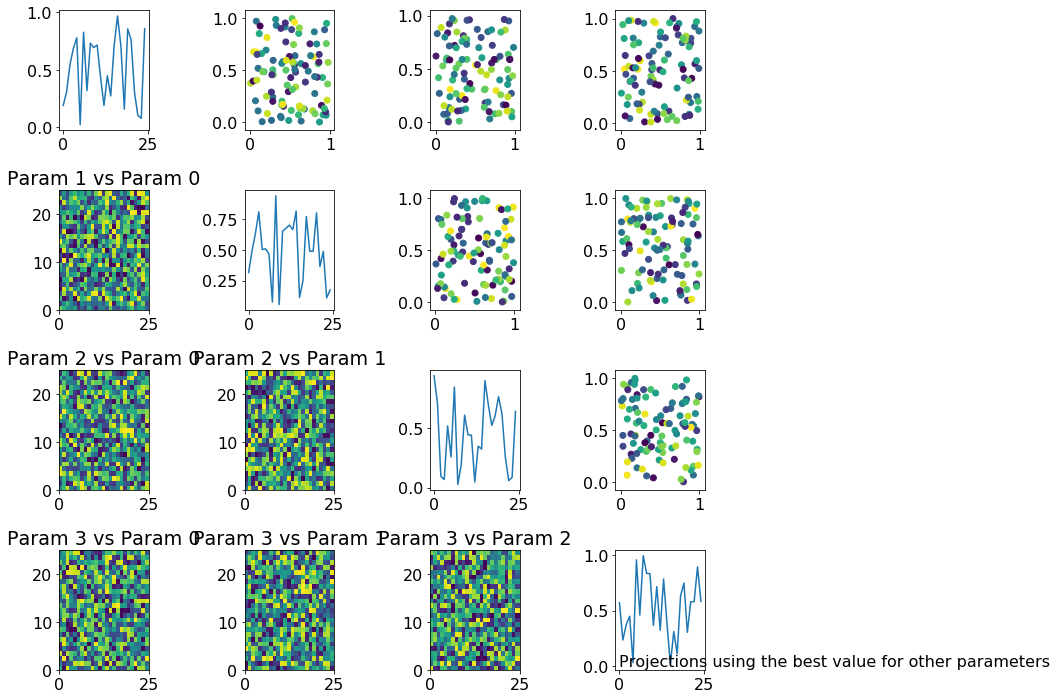

In [40]:
from prettyplotlib import plt
import numpy as np
fig,ax = plt.subplots(4,4,figsize=(10,10))
attrs_list = list(pop[0].dtc.attrs)
for i in range(4):
    for j in range(4):
        if i<j:
            # genes is a list of all the gene coordinates, with N coordinates per gene
            #ax[i,j].scatter(*genes[but only the two dimensions that are i and j])
            #x = [ g.dtc.attrs[attrs_list[i]] for g in pop ]
            #y = [ g.dtc.attrs[attrs_list[j]] for g in pop ]
            #z = [ sum(list(g.dtc.scores.values())) for g in pop ]
            #[g.dtc.attrs['a'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ]
            ax[i,j].scatter(*np.random.rand(2,100),c=np.random.rand(100))
        elif i>j:
            ax[i,j].set_title('Param %d vs Param %d' % (i,j))
            # Z = 2D grid search with all params except i and j held constant at optimum
            Z = np.random.rand(25,25)
            ax[i,j].pcolormesh(Z)
        else: # i==j
            #z = 1D grid search with all params except i held contant at optimum
            z = np.random.rand(25)
            ax[i,i].plot(z)
plt.tight_layout()
plt.text(0,0,'Projections using the best value for other parameters')

So imagine 6 2D plots.  The first three are:  XY at Z=z, XZ at Y=y, and YZ at X=x, where x, y, z 
is the location of the global minimum.  The second three are XY with the minimum taken across Z, 
XZ with the minumum taken across Y, YZ, with the minimum taken across X.
With these 6 I think you would get a pretty good idea of the contours around the global minimum.

In [ ]:


with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
log = package[3]    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]

mean = np.array([ np.sum(i) for i in log.select('avg')])
std = np.array([ np.sum(i) for i in log.select('std')])
minimum = np.array([ np.sum(i) for i in log.select('min')])
#minimum = np.array([ np.sum(i) for i in log.select('min')])
worst = np.max([ sum(g.dtc.scores.values()) for g in grid_results ])
#grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gwl = [ worst for i in range(0,len(log.select('gen'))) ]
grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gml = [ grid_min for i in range(0,len(log.select('gen'))) ]

if new_report[nparams]['success'] == True:
    axes.plot(gen_numbers,
              gml,
              color='blue',
            linewidth=2,
            label='exhaustive search best')

    axes.plot(gen_numbers,
              gwl,
              color='yellow',
            linewidth=2,
            label='exhaustive search worst')
    


    stdminus = mean - std
    stdplus = mean + std

    axes.plot(
        gen_numbers,
        minimum,
        color='black',
        linewidth=2,
        label='population minimum')
    axes.fill_between(gen_numbers, stdminus, stdplus)


axes.plot(
    gen_numbers,
    mean,
    color='black',
    linewidth=2,
    label='population average')
    



plt.xlabel('generation')
plt.ylabel('error')


plt.legend()
plt.show()
print(worst,grid_min)

In [ ]:

#fig.savefig('pcolormesh_prettyplotlib_labels_other_cmap_diverging.png')


In [ ]:
import bokeh
import numpy as np
import matplotlib

In [ ]:


from neuronunit.optimization.optimization_management import run_ga
from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
from neuronunit.optimization.model_parameters import model_params
import os
import pickle
from neuronunit.optimization import get_neab
reports = {}
npoints = 10



with open('pre_grid_reports.p','rb') as f:
    grid_results = pickle.load(f)
opt_keys = list(grid_results[0].dtc.attrs.keys())

with open('pre_ga_reports.p','rb') as f:
    ga_out = pickle.load(f)

pop = ga_out[0]
genes_vs_gen = ga_out[-1]

In [ ]:

from neuronunit.optimization.exhaustive_search import create_grid
gp = create_grid(npoints = 6,nparams = 3)

    


Found tough parameters for which the GA is not able to perform particularily # well. Suspect b's error surface is not concave.
Explore 1D cross section.


In [ ]:

plt.clf()

plt.scatter([g.dtc.attrs['a'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['a'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute a')
plt.legend()
plt.show()


plt.scatter([g.dtc.attrs['vr'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['vr'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute vr')
plt.legend()
plt.show()



plt.scatter([g.dtc.attrs['b'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['b'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute b')
plt.legend()
plt.show()




In [ ]:

nparams = 3
opt_keys = [str('a'),str('vr'),str('b')]


#grid_results = run_grid(nparams,npoints,tests,provided_keys = opt_keys)
from neuronunit.optimization import exhaustive_search #import run_grid, reduce_params, create_grid

from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
grid_points,maps = exhaustive_search.create_grid(npoints=6,nparams=3,provided_keys=opt_keys)
print(maps)

In [ ]:
def blah():
    '''
    This works but I changed the grid
    '''
    grid = np.zeros((6,6,6))
    import matplotlib.pyplot as plt
    print(maps)
    for i in grid_results:
        xyz = []
        for k,v in i.dtc.attrs.items():
            print(k,v)
            #print(maps[v][k])
            xyz.append(maps[k][v])
        grid[xyz[0],xyz[1],xyz[2]] = sum(i.dtc.scores.values())

    for i in range(0,6):
        flat = grid[i,:,:]
        plt.imshow(flat)
        plt.show()

    for i in range(0,6):
        flat = grid[:,i,:]
        plt.imshow(flat)
        plt.show()

    for i in range(0,6):
        flat = grid[:,:,i]
        plt.imshow(flat)
        plt.show()
        
    


In [ ]:
#new_list = genes_vs_gen[1:-1]
#print(new_list)

In [ ]:
#![alt text](rick_style_guide.png "Ricks table guide")

In [ ]:
dfg



I am currently writing code that should enable the plotting of HOF values versus generation.

For some reason the global minimum solution is not converged on, as shown by the evolution of errors below:

For some reason, the GA population does not converge to the absolute minimum, although it does sample it.
Perhaps the absolute minimum is a highly dominated solution, which is a testable hypthosis.

None the less because the GA samples the absolute minimum, this value can be corroborated with the GA.

# Quantize distance between minimimum error and maximum error.
This step will allow the GA's performance to be located within or below the range of error found by grid search.


The code below reports on the differences between between attributes of best models found via grid versus attributes of best models found via GA search:
